<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/stats/paphos_summer_weather_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.visualcrossing.com/weather/weather-data-services#

In [ ]:
from datetime import datetime, timedelta

# Get today's date
today = datetime.now()

# Calculate the date 14 days ago
date_14_days_ago = today - timedelta(days=14)

# Format the dates in YYYY-MM-DD format
today_str = today.strftime('%Y-%m-%dT%H:%M:%S')
date_14_days_ago_str = date_14_days_ago.strftime('%Y-%m-%dT%H:%M:%S')


date1=date_14_days_ago_str
date2=today_str

print ("from ", date1, " to ", date2)

prompt=input("1 for Pahos 2 for Myrtle Beach ")

paphos="34.69741074283549,32.612644527285106"
sc="33.46242581990894,-79.13561525981794"

if prompt == "1":
  location=paphos
  filestr = "paphos"
  unitgroup = "metric"
else:
  location=sc
  filestr = "sc"
  unitgroup = "us"

apikey = input("API Key")

from  2024-07-07T08:08:25  to  2024-07-21T08:08:25
1 for Pahos 2 for Myrtle Beach 1
API KeyET2UEWPH7KFHT289DDMPTQJFV


In [ ]:
url='https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{0}/{1}/{2}?key={3}&include=hours&contentType=csv&unitGroup={4}'.format(location,date1,date2,apikey,unitgroup)
print(url)

https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/34.69741074283549,32.612644527285106/2024-07-07T08:08:25/2024-07-21T08:08:25?key=ET2UEWPH7KFHT289DDMPTQJFV&include=hours&contentType=csv&unitGroup=metric


In [ ]:


#apikey="4ZFA84NTR2ZPN26CUHYRJ9QVG"

# old one
#url='34.69741074283549,32.612644527285106/2024-07-16T00:00:00/2024-07-19T24:00:00?key=ET2UEWPH7KFHT289DDMPTQJFV&include=hours&contentType=csv'



url='https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{0}/{1}/{2}?key={3}&include=hours&contentType=csv'.format(location,date1,date2,apikey)

print

import requests

headers = {'Accept': 'text/csv'}


# Send the GET request
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Save the content to a CSV file
    with open(filestr + ".csv", 'wb') as file:
        file.write(response.content)
    print("CSV file downloaded and saved as ", filestr + ".csv")
else:
    print(f"Failed to retrieve the CSV file. Status code: {response.status_code}")


CSV file downloaded and saved as  paphos.csv


In [ ]:
import pandas as pd


df=pd.read_csv(filestr + ".csv",usecols=['datetime','temp','feelslike','humidity'],parse_dates=['datetime'])
df.set_index('datetime', inplace=True)
df=df.between_time('08:00', '18:00')


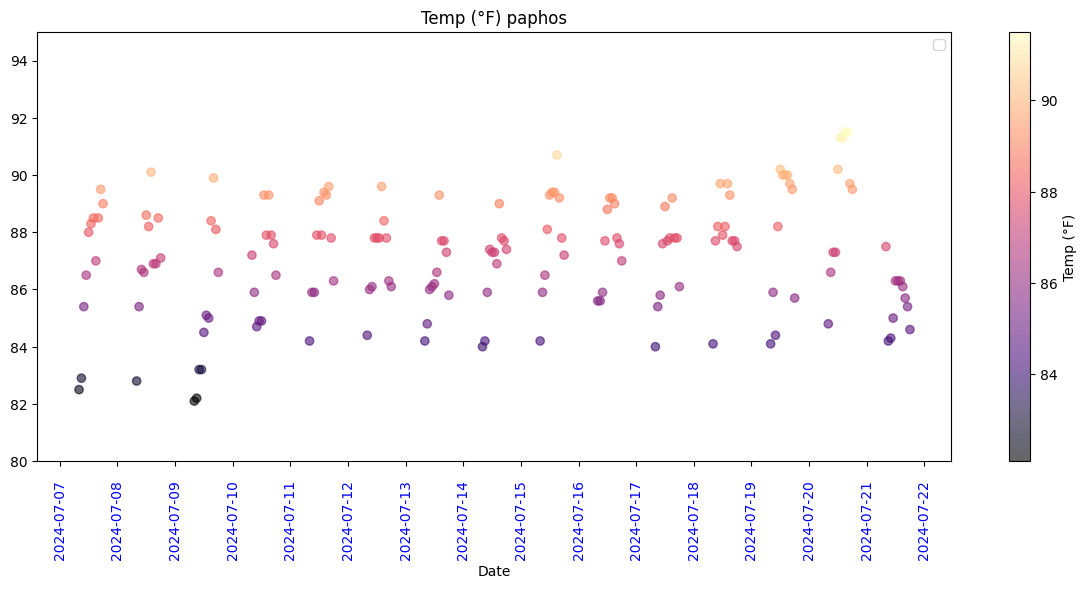

In [ ]:
import matplotlib.dates as mdates


# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

#plt.cm.hot_r

# Scatter plot with colormap
sc = ax.scatter(df.index, df['temp'], c=df['temp'],cmap="magma",  alpha=0.6)

# Adding color bar
cbar = plt.colorbar(sc)
cbar.set_label('Temp (°F)')

# Set labels
ax.set_xlabel('Date')

plt.xticks(rotation=90)

# Set major and minor ticks format
ax.xaxis.set_major_locator(mdates.DayLocator())
#ax.xaxis.set_minor_locator(mdates.HourLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H'))

# Rotate x-ticks
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, color='blue', ha='center', va='top', position=(0, -0.02))
#plt.setp(ax.xaxis.get_minorticklabels(), rotation=90, color='purple', ha='center', va='bottom')

# Move minor ticks (hours) below x-axis
ax.tick_params(axis='x', which='minor', pad=15)

#ax.tick_params(axis='x', which='major', pad=15)

plt.ylim(80,95)

# Adding a title
if unitgroup == "metric":
  plt.title('Temp (°C) ' + filestr)
else:
  plt.title('Temp (°F) ' + filestr)

# Adding legends
plt.legend()

# Displaying the chart
plt.tight_layout()
plt.show()

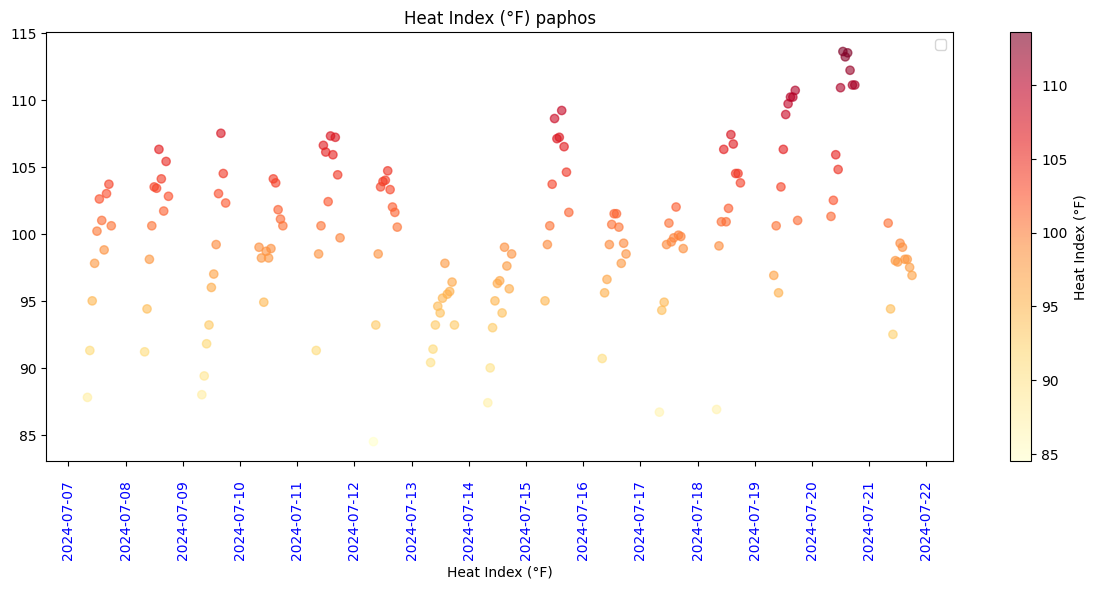

In [ ]:
import matplotlib.dates as mdates


# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot with colormap
sc = ax.scatter(df.index, df['feelslike'], c=df['feelslike'],cmap='YlOrRd',  alpha=0.6)

# Adding color bar
cbar = plt.colorbar(sc)
cbar.set_label('Heat Index (°F)')

# Set labels
ax.set_xlabel('Heat Index (°F)')
plt.xticks(rotation=90)

# Set major and minor ticks format
ax.xaxis.set_major_locator(mdates.DayLocator())
#ax.xaxis.set_minor_locator(mdates.HourLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H'))

# Rotate x-ticks
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90, color='blue', ha='center', va='top', position=(0, -0.02))
#plt.setp(ax.xaxis.get_minorticklabels(), rotation=90, color='purple', ha='center', va='bottom')

# Move minor ticks (hours) below x-axis
ax.tick_params(axis='x', which='minor', pad=15)

#ax.tick_params(axis='x', which='major', pad=15)


# Adding a title

if unitgroup == "metric":
  plt.title('Heat Index (°C) ' + filestr)
else:
  plt.title('Heat Index (°F) ' + filestr)


# Adding legends
plt.legend()

# Displaying the chart
plt.tight_layout()
plt.show()

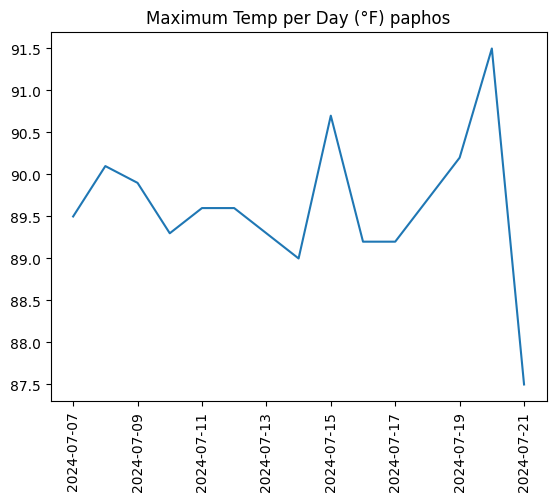

In [ ]:
temp = df.resample('D').max()

plt.plot(temp.index,temp['temp'])
plt.xticks(rotation=90)
plt.title('Maximum Temp per Day (°F) ' + filestr)
plt.show()

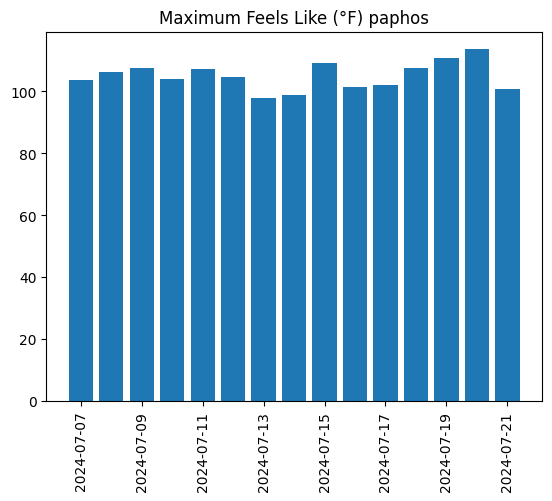

In [ ]:
feelselike = df['feelslike'].resample('D').max()
plt.bar(feelselike.index,feelselike)
plt.xticks(rotation=90)
plt.title('Maximum Feels Like (°F) ' + filestr)
plt.show()

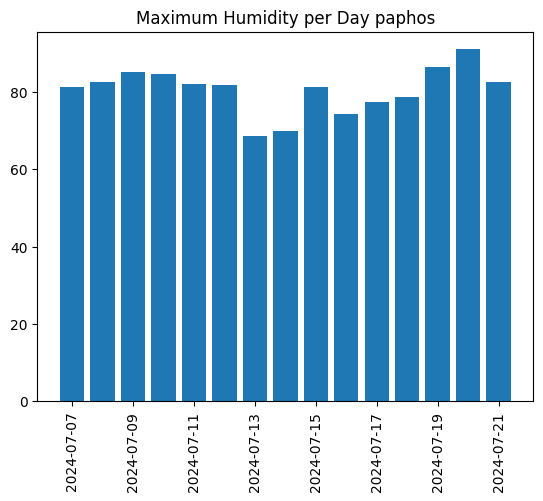

In [ ]:
max_humidity_per_day = df['humidity'].resample('D').max()
plt.bar(max_humidity_per_day.index,max_humidity_per_day)
plt.xticks(rotation=90)
plt.title('Maximum Humidity per Day ' + filestr)
plt.show()


In [ ]:
from google.colab import drive
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Source path of your file (assuming it's in the current working directory)
source_path = filestr + ".csv"

# Destination path in your Google Drive
#destination_path = '/content/drive/My Drive/' + filestr + "." + today_str

destination_path = '/content/drive/My Drive/weather/' + filestr +  today_str + ".csv"

# Copy the file
shutil.copy(source_path, destination_path)

print(f'File saved to {destination_path}')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File saved to /content/drive/My Drive/weather/paphos2024-07-21T06:56:10.csv
